# Test Audio Samples - 48kHz Models

In [55]:
import torchaudio
from pathlib import Path
import auraloss
import numpy as np
from scipy.fft import fft, fftfreq
from scipy import signal

import matplotlib.pyplot as plt
from matplotlib.ticker import ScalarFormatter, LogLocator
%matplotlib inline

In [56]:
sample_rate = 48000
n_fft_value = 128
hop_length_value = n_fft_value // 2
window = np.hanning(n_fft_value)
start = 48000
end = 49000

zoom_spec = sample_rate * 4

SAMPLES_DIR = Path("results/audio_batches")

In [57]:
import auraloss  # If auraloss is not imported yet
dc_loss = auraloss.time.DCLoss()

def check_dc_offset(pred, target):
    pred_offset = pred.mean()
    target_offset = target.mean()
    dc_offset = pred_offset - target_offset

    # Round the DC offset to 6 decimal places
    dc_offset_rounded = round(dc_offset, 6)

    # Smallest quantization step for 24-bit audio
    quantization_step_24bit = 1 / 8388607.0

    # Check if the absolute value of the DC offset is smaller or larger than the quantization step
    if abs(dc_offset_rounded) < quantization_step_24bit:
        print(f"The DC offset ({dc_offset_rounded}) is smaller than the smallest quantization step for 24-bit audio.")
    else:
        print(f"The DC offset ({dc_offset_rounded}) is larger than the smallest quantization step for 24-bit audio.")

# Usage:
# pred and target should be the predicted and target signals, respectively.
# check_dc_offset(pred, target)


In [58]:
def overlap_waveforms(o, t, sample_rate, start, end, title):    

    o_zoom = o[start:end]
    t_zoom = t[start:end]

    # create time vector
    time = range(start, end)

    plt.figure(figsize=(12,3))
    plt.plot(time, o_zoom, alpha=0.8, label="Model")
    plt.plot(time, t_zoom, alpha=0.8, label="Target")
    plt.xlabel("Time (samples)")
    plt.ylabel("Amplitude")
    plt.title(title)
    plt.legend()
    plt.grid()
    plt.savefig(f"results/plots/{title}_waves.png")
    plt.show()

def two_spectrograms_difference(o, t, sample_rate, title, zoom=False):

    N = len(o)                   # Number of sample points
    T = 1.0 / sample_rate        # sample spacing

    # Apply Hann window
    windowed_o = o * signal.windows.hann(N)
    windowed_t = t * signal.windows.hann(N)

    o_yf = fft(windowed_o)
    t_yf = fft(windowed_t)
    
    xf = fftfreq(N, 1/sample_rate)[:N//2]

    # Convert magnitude to dB scale
    o_mag_in_db = 20 * np.log10(np.abs(o_yf[:N//2]))
    t_mag_in_db = 20 * np.log10(np.abs(t_yf[:N//2]))

    plt.figure(figsize=(12,4))
    plt.plot(xf, o_mag_in_db, linewidth=0.5, alpha=.6, label="Model")
    plt.plot(xf, t_mag_in_db, linewidth=0.5, alpha=.6, label="Target")
    plt.plot
    plt.grid()
    plt.xlim(20, sample_rate/2)
    plt.ylim(-120, np.max(o_mag_in_db)+10)
    plt.xscale('log')
    plt.title(title)
    plt.xlabel('Frequency (Hz)')
    plt.ylabel('Magnitude (dB)')
    plt.legend()
    
    # Use ScalarFormatter to avoid scientific notation
    ax = plt.gca()
    ax.xaxis.set_major_formatter(ScalarFormatter())
    ax.xaxis.get_major_formatter().set_scientific(False)
    ax.xaxis.get_major_formatter().set_useOffset(False)
    plt.tight_layout()
    plt.savefig(f"results/plots/{title}_spectra.png")
    plt.show()

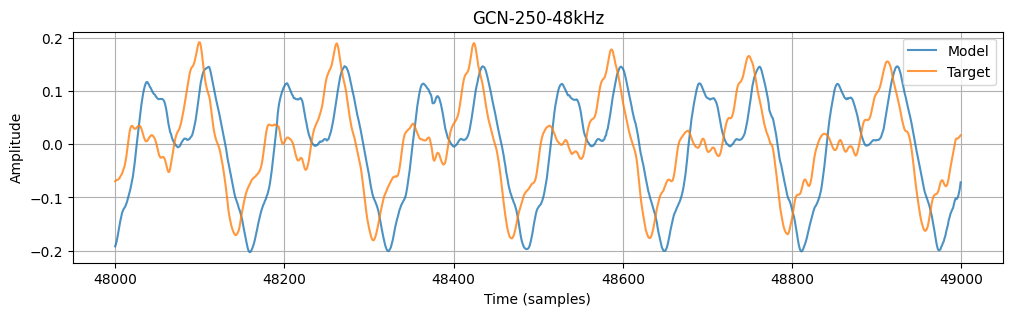

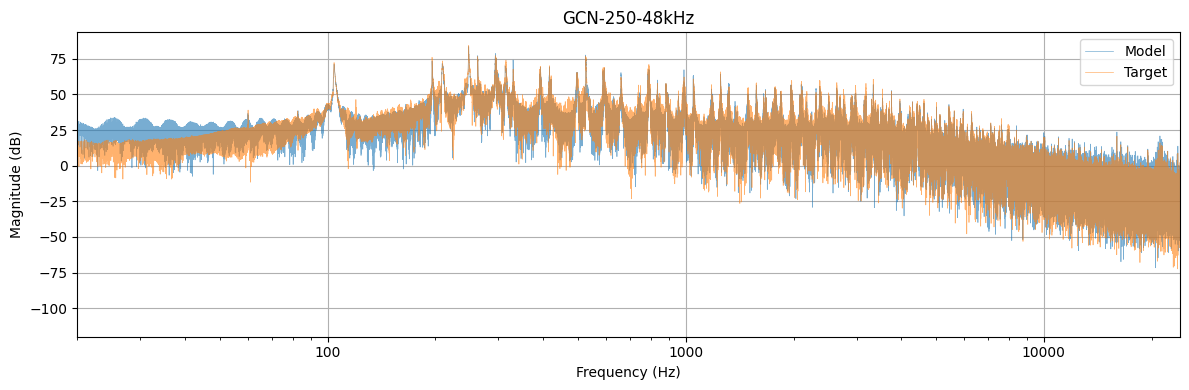

The DC offset (-1.9999999949504854e-06) is larger than the smallest quantization step for 24-bit audio.


In [59]:
o_p, sample_rate = torchaudio.load(SAMPLES_DIR / "out_gcn-250_48k.wav")
t_p, t_sr = torchaudio.load(SAMPLES_DIR / "tgt_gcn-250_48k.wav")

o_p = o_p.view(1, 1, -1)
t_p = t_p.view(1, 1, -1)

o = o_p.numpy().squeeze()
t = t_p.numpy().squeeze()


title = "GCN-250-48kHz"

overlap_waveforms(o, t, sample_rate, start, end, title)
two_spectrograms_difference(o, t, sample_rate, title, zoom_spec)
check_dc_offset(o, t)

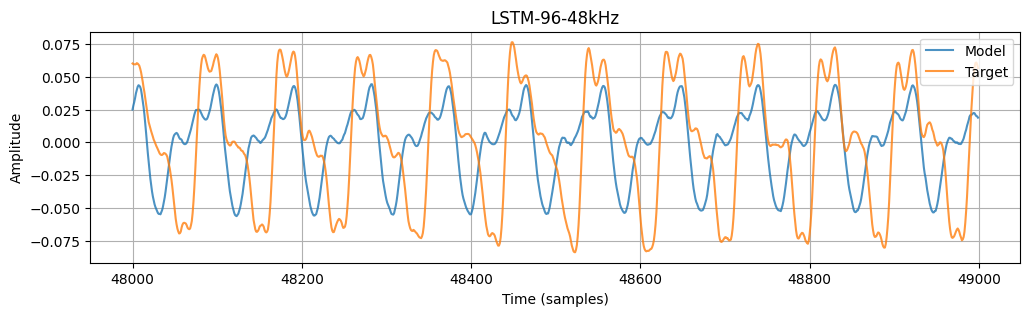

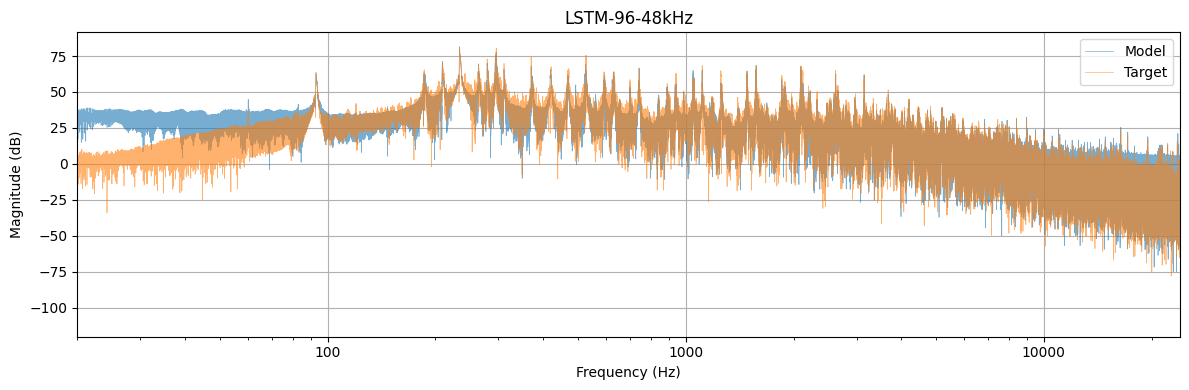

The DC offset (-9.999999974752427e-07) is larger than the smallest quantization step for 24-bit audio.


In [60]:
title = "LSTM-96-48kHz"

o_lstm_96_leg, _ = torchaudio.load(SAMPLES_DIR / "out_lstm-cs-96_48k.wav")
t_lstm_96_leg, _ = torchaudio.load(SAMPLES_DIR / "tgt_lstm-cs-96_48k.wav")

o = o_lstm_96_leg.numpy().squeeze()
t = t_lstm_96_leg.numpy().squeeze()

overlap_waveforms(o, t, sample_rate, start, end, title)
two_spectrograms_difference(o, t, sample_rate, title, zoom_spec)
check_dc_offset(o, t)

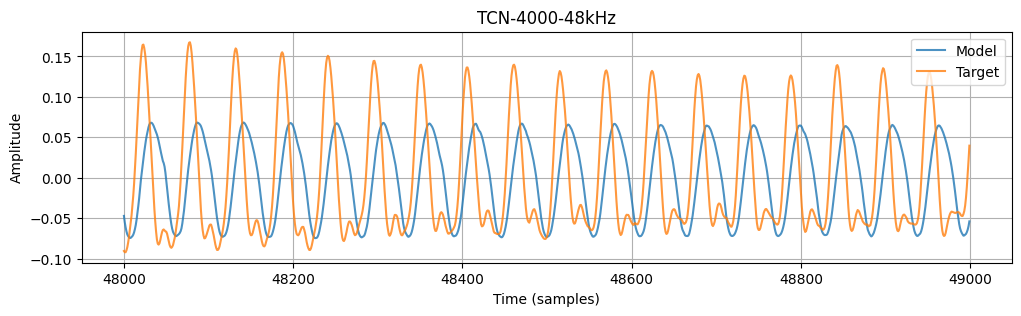

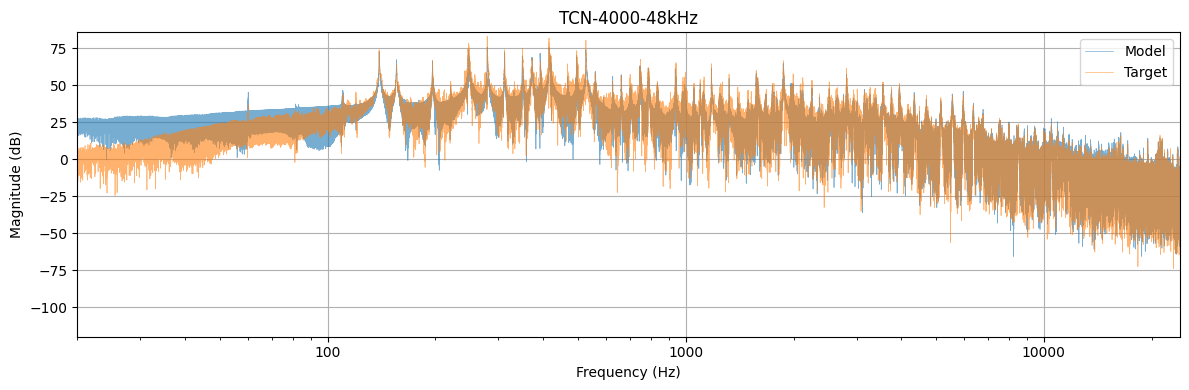

The DC offset (3.000000106112566e-06) is larger than the smallest quantization step for 24-bit audio.


In [61]:
title = "TCN-4000-48kHz"

o_tcn, _ = torchaudio.load(SAMPLES_DIR / "out_tcn-4000_48k.wav")
t_tcn, _ = torchaudio.load(SAMPLES_DIR / "tgt_tcn-4000_48k.wav")

o = o_tcn.numpy().squeeze()
t = t_tcn.numpy().squeeze()


overlap_waveforms(o, t, sample_rate, start, end, title)
two_spectrograms_difference(o, t, sample_rate, title, zoom_spec)
check_dc_offset(o, t)

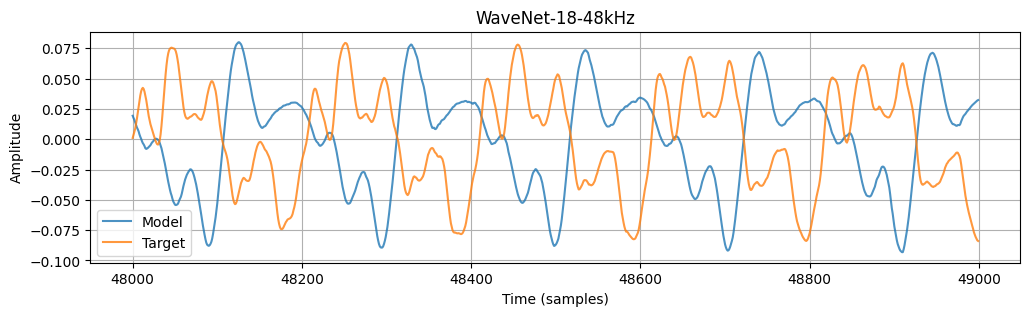

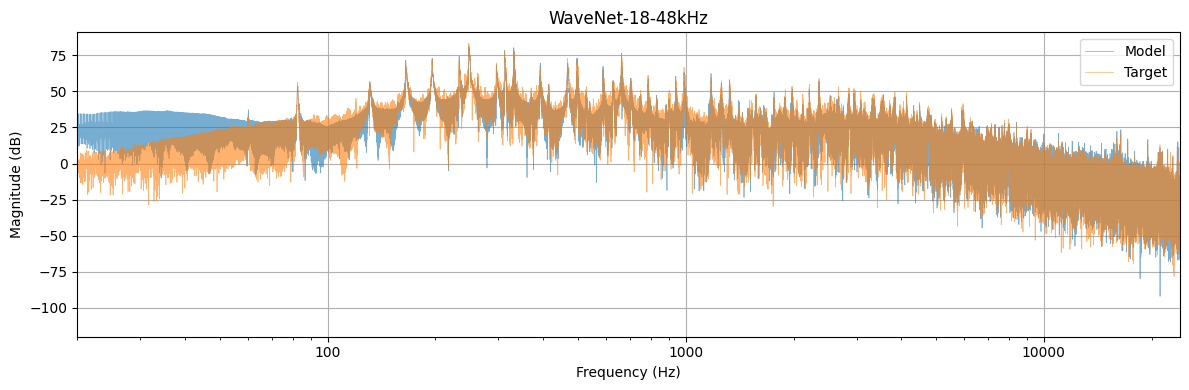

The DC offset (0.0) is smaller than the smallest quantization step for 24-bit audio.


In [62]:
title = "WaveNet-18-48kHz"

o_p, sample_rate = torchaudio.load(SAMPLES_DIR / "out_wavenet-18_48k.wav")
t_p, t_sr = torchaudio.load(SAMPLES_DIR / "tgt_wavenet-18_48k.wav")

o = o_p.numpy().squeeze()
t = t_p.numpy().squeeze()

overlap_waveforms(o, t, sample_rate, start, end, title)
two_spectrograms_difference(o, t, sample_rate, title, zoom_spec)
check_dc_offset(o, t)